# Travaux Pratiques – Chaînes de Markov-HMMs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### I Chaîne de Marko

#### 1. Phrase en anglais

In [88]:
dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ' }

In [89]:
filename_A = 'bigramenglish.txt'
transition_anglais = np.loadtxt(filename_A)

##### a) Matrice de transition 

In [90]:
transition_anglais.shape

(28, 28)

In [91]:
transition_anglais[0]

array([0.0000000e+00, 1.1268720e-01, 4.3608943e-02, 4.5454545e-02,
       3.2904451e-02, 2.2094495e-02, 4.1763341e-02, 1.5555790e-02,
       6.4437882e-02, 6.8920059e-02, 3.6384729e-03, 4.2185193e-03,
       2.3465514e-02, 3.9759544e-02, 2.2832736e-02, 7.0343809e-02,
       3.1058848e-02, 1.4237503e-03, 2.5680236e-02, 6.6916262e-02,
       1.6452225e-01, 1.0388104e-02, 7.0660198e-03, 7.0502004e-02,
       1.0546298e-04, 1.0599030e-02, 5.2731491e-05, 0.0000000e+00])

La première ligne correspond à la probabilité de transition depuis l'état "espace initial" vers toutes les autres lettres.

In [92]:
transition_anglais[:, -1]

array([0.0000000e+00, 6.7478169e-02, 7.1084433e-03, 1.9535224e-02,
       5.9884373e-01, 3.6047379e-01, 3.9653963e-01, 3.1566736e-01,
       1.0300926e-01, 2.4606608e-02, 9.5877277e-04, 3.7225637e-01,
       1.5338255e-01, 1.5795761e-01, 2.9421872e-01, 1.2308174e-01,
       6.4222084e-02, 1.3966480e-03, 2.1088912e-01, 4.3030156e-01,
       2.2273059e-01, 3.8466582e-02, 9.9108028e-05, 1.0216281e-01,
       1.2345679e-01, 7.7582944e-01, 1.9193858e-03, 1.0000000e+00])

La derniere colonne correspond à la probabilité vers l'état "espace final" depuis n'importe quel lettre.

In [93]:
transition_max = []
for argmax in  np.argmax(transition_anglais, axis=1):
    transition_max.append(dic[str(argmax+1)])
print(transition_max)

['t', 'n', 'e', 'o', ' ', ' ', ' ', ' ', 'e', 'n', 'o', ' ', 'e', 'e', ' ', 'n', 'e', 'u', 'e', ' ', 'h', 'r', 'e', 'a', 't', ' ', 'e', ' ']


##### b) Générer un mot 

In [94]:
def etat_suivant(localTransitions):
    unif = np.random.random()
    cs=np.cumsum(localTransitions)
    stat=0
    while(unif >=cs[stat]):
        stat=stat+1
    return stat

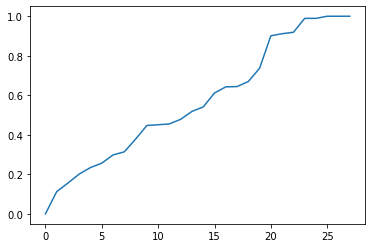

In [95]:
plt.plot(np.cumsum(transition_anglais[0]))

La fonction de répartition nous donne pour le caractère d'indice i la probabilité que cette lettre, ou une des précédentes, soit sélectionné.

In [96]:
def genere_state_seq(transition_anglais):
    seq = [0]
    i=0
    while seq[i] != (len(transition_anglais) - 1) :
        seq.append(etat_suivant(transition_anglais[seq[i]]))
        i+=1
    return seq

In [97]:
def display_seq(seq, dic):
    mot = ""
    for s in seq :
        mot += dic[str(s+1)]
    return mot

Generation d'une sequence aléatoire :

In [109]:
random_seq = genere_state_seq(transition_anglais)

Transformation de cette séquence en mot :

In [110]:
display_seq(random_seq, dic)

' the '

##### c) Générer une phrase

In [111]:
# création de la 29ème ligne 
ligne_point = np.zeros((1,29))

In [112]:
def modifie_mat_dic(transition_anglais):
    transition_anglais = np.append(transition_anglais, np.zeros((28,1)), axis=1)
    transition_anglais = np.append(transition_anglais, ligne_point, axis=0)
    transition_anglais[-1,-1] = 1
    transition_anglais[-2,-1] = 0.1
    transition_anglais[-2,-2] = 0
    transition_anglais[-2,0] = 0.9
    return transition_anglais

In [113]:
transition_anglais_phrase = modifie_mat_dic(transition_anglais)
transition_anglais_phrase.shape

(29, 29)

In [114]:
dic_phrase={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i'
            , '11': 'j', '12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' 
            , '20': 's', '21' : 't', '22': 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z'
            , '28' : ' ', '29' : '.' }

Generation de phrase 

In [121]:
random_seq_phrase = genere_state_seq(transition_anglais_phrase)

In [122]:
display_seq(random_seq_phrase, dic_phrase)

' mo  catiemongafod  bebed  t  thlean  we  ng  athenis  linon .'

#### 2. Reconnaissance de la langue

In [123]:
filename_B = 'bigramfrancais.txt'
transition_francais = np.loadtxt(filename_B)

In [124]:
transition_francais = modifie_mat_dic(transition_francais)

In [125]:
dic_phrase_modif={'1' : '-', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h'
                   , '10': 'i', '11': 'j', '12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p',
                   '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22': 'u', '23': 'v', '24' : 'w', '25' : 'x' 
                   , '26': 'y', '27' : 'z', '28' : '+', '29' : '.' }

In [126]:
def calc_vraisemblance(phrase, transition_francais, dic_phrase):
    vraisemblance = 1
    i=0
    transition_index = []
    for caractere in phrase:
        for key, value in dic_phrase.items():
            if value == caractere:
                transition_index.append(int(key) -1)
    t0 = transition_index[0]
    for t in transition_index[1:] :
        vraisemblance *= transition_francais[t0, t]
        t0=t
    return vraisemblance

In [127]:
phrase1 = "-to+-be+-or+-not+-to+-be+."
phrase2 = "-etre+-ou+-ne+-pas+-etre+."

In [128]:
print("vraisemblance de la phrase « to be or not to be » en francais : " 
      + str(calc_vraisemblance(phrase1, transition_francais, dic_phrase_modif)))
print("vraisemblance de la phrase « to be or not to be » en anglais : " 
      + str(calc_vraisemblance(phrase1, transition_anglais_phrase, dic_phrase_modif)))

vraisemblance de la phrase « to be or not to be » en francais : 5.9602081018686406e-30
vraisemblance de la phrase « to be or not to be » en anglais : 8.112892227809415e-20


In [129]:
print("vraisemblance de la phrase « etre ou ne pas etre » en francais : " 
      + str(calc_vraisemblance(phrase2, transition_francais, dic_phrase_modif)))
print("vraisemblance de la phrase « etre ou ne pas etre » en anglais : " 
      + str(calc_vraisemblance(phrase2, transition_anglais_phrase, dic_phrase_modif)))

vraisemblance de la phrase « etre ou ne pas etre » en francais : 1.145706887234789e-19
vraisemblance de la phrase « etre ou ne pas etre » en anglais : 4.462288711775253e-24


### II. HMM

In [130]:
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/matrice_symboles.txt'
v = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/A0.txt'
A0 = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/B0.txt'
B0 = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/vect_pi0.txt'
pi0 = np.loadtxt(filename) 

#### 1. Génération de séquences d’observations

##### a)

In [131]:
v

array([[0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

Les zeros dans la matrice A represente les transitions impossible de l'état i vers l'état j. Par exemple, depuis l'état 1, il y une probabilité de 0.84 de rester dans l'état 1 et de 0.16 de passer à l'état 2. Dans létat 5, il y a une probabilité 1 de rester dans l'état 5.

In [132]:
A0

array([[ 0.84178118,  0.15821882, -0.        , -0.        , -0.        ],
       [-0.        ,  0.7886163 ,  0.2113837 , -0.        , -0.        ],
       [-0.        , -0.        ,  0.86339743,  0.13660257, -0.        ],
       [-0.        , -0.        , -0.        ,  0.79150194,  0.20849806],
       [-0.        , -0.        , -0.        , -0.        ,  1.        ]])

On a une probilité de 1 de commencer à l'état 1, les états à 0 n'ont aucune chance d'être des états initiaux.

In [133]:
pi0

array([1., 0., 0., 0., 0.])

La matrice B donne, pour chacun des 5 états, la probabilité d'avoir un des 32 patterns Mnist simplifiés.

In [134]:
B0.shape

(32, 5)

##### b)

In [135]:
def etat_suivant(current_state):
    unif = np.random.random()
    cs=np.cumsum(current_state)
    stat=0
    while(unif >=cs[stat]):
        stat=stat+1
    return stat

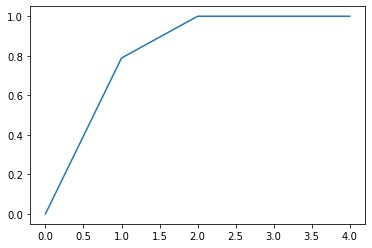

In [136]:
plt.plot(np.cumsum(A0[1]))
plt.show()

On a donc environ 79% de chance de rester à l'état 2 et 21% de passer à l'état 3 quand on est à l'état 2.

##### c)

In [137]:
def genere_state_seq(transition):
    seq = [0]
    i=0
    while i != 27 :
        seq.append(etat_suivant(transition[seq[i]]))
        i+=1
    return seq

In [36]:
def genere_observation(mat_obs, state_seq):
    observation =[]
    for seq in state_seq :
        probas = mat_obs[:, seq]
        unif = np.random.random()
        cs=np.cumsum(probas)
        obs=0
        while(unif >=cs[obs]):
            obs=obs+1
        observation.append(obs)
    return observation

On commence par générer la séquence d'état.

In [37]:
state_seq = genere_state_seq(A0)
print(state_seq)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Puis on génère la séquence d'observation à partir de cette séquence d'état.

In [38]:
observation = genere_observation(B0, state_seq)
print(observation)

[0, 0, 0, 0, 0, 0, 13, 13, 22, 17, 10, 22, 10, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### d)

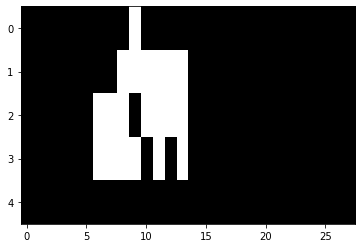

In [41]:
im=[]
for o in observation :
    im_col=v[:, o]
    im.append(im_col)
    
im = np.array(im).T
plt.imshow(im, cmap='gray', aspect='auto')

L'image qu'on a généré est à partir de la forme du 0. On devine une ressemblance avec la forme légèrement sphérique du pattern.

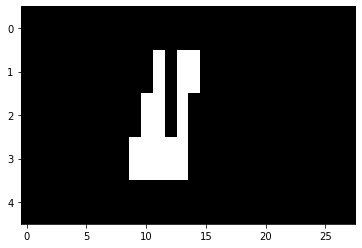

In [74]:
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/A1.txt'
A1 = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/B1.txt'
B1 = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/vect_pi1.txt'
pi1 = np.loadtxt(filename) 

state_seq1 = genere_state_seq(A1)
observation1 = genere_observation(B1, state_seq1)

im1=[]
# les x contiennent les index dans le dictionnaire
for o in observation1 :
    im_col=v[:, o]
    im1.append(im_col)
    
im1 = np.array(im1).T
plt.imshow(im1*255, cmap='gray', aspect='auto')

Cette forme est généré à partir d'un 1. On peut deviner légèrement la forme allongée du 1.

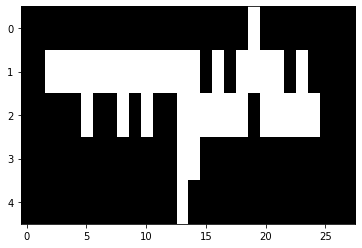

In [78]:
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/A7.txt'
A7 = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/B7.txt'
B7 = np.loadtxt(filename) 
filename= 'C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/vect_pi7.txt'
pi7 = np.loadtxt(filename) 

state_seq7 = genere_state_seq(A7)
observation7 = genere_observation(B7, state_seq7)

im7=[]
# les x contiennent les index dans le dictionnaire
for o in observation7 :
    im_col=v[:, o]
    im7.append(im_col)
    
im7 = np.array(im7).T
plt.imshow(im7*255, cmap='gray', aspect='auto')

Pour le 7, c'est un peu plus difficile de rapprocher ce pattern d'une forme connue.

#### 2. Calcul de la vraisemblance de séquences d’observations

##### a)

In [82]:
filename = "C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/SeqTest0.txt"
SeqTest0 = np.loadtxt(filename)

filename = "C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/SeqTest1.txt"
SeqTest1 = np.loadtxt(filename)

filename = "C:/Users/antoi/Documents/Telecom Paris/Cours/MDI341 Machine Learning Avancée/TP6 HMM/data_txt_compact/SeqTest7.txt"
SeqTest7 = np.loadtxt(filename)

##### b)

In [83]:
def vraisemblance_viterbi(A, B, Pi, sequence_obs):
    eps = 1e-7
    A = np.log(A + eps)
    B = np.log(B + eps)
    Pi = np.log(Pi + eps)
    
    d = np.zeros((5,28), dtype = np.int)
    p = np.zeros((5,28), dtype = np.int)
    obs = [int(i) for i in sequence_obs]
    d[:,0] =  Pi + B[obs[0]-1,:]
    
    for j in range(1, 28):
        k = obs[j] - 1
        for i in range(5):
            seq = A[:, i] + d[:, j - 1]
            d[i, j] = B[k, i] + np.max(seq)
            p[i, j] = np.argmax(seq)
            
    track = np.zeros(28, dtype = np.int)
    track[-1] = np.argmax(d[:,-1])
    
    for k in range(28 - 2, -1, -1):
        track[k] = p[track[k+1], 1 + k]

    likelihood = d[track[-1], -1]
    return likelihood

In [85]:
liste_vraisemblance_0 = []
liste_vraisemblance_1 = []
liste_vraisemblance_7 = []

for i,seq in enumerate(SeqTest0):
    liste_vraisemblance_0.append(vraisemblance_viterbi(A0,B0,pi0, seq))
    
    liste_vraisemblance_1.append(vraisemblance_viterbi(A1,B1,pi1, seq))

    liste_vraisemblance_7.append(vraisemblance_viterbi(A7,B7,pi7, seq))
    
print('Vraisemblance pour 0 :', np.mean(liste_vraisemblance_0))
print('Vraisemblance pour 1 :', np.mean(liste_vraisemblance_1))
print('Vraisemblance pour 7 :', np.mean(liste_vraisemblance_7))

Vraisemblance pour 0 : -17.3
Vraisemblance pour 1 : -69.7
Vraisemblance pour 7 : -74.3


In [86]:
liste_vraisemblance_0 = []
liste_vraisemblance_1 = []
liste_vraisemblance_7 = []

for i,seq in enumerate(SeqTest1):
    liste_vraisemblance_0.append(vraisemblance_viterbi(A0,B0,pi0, seq))
    
    liste_vraisemblance_1.append(vraisemblance_viterbi(A1,B1,pi1, seq))

    liste_vraisemblance_7.append(vraisemblance_viterbi(A7,B7,pi7, seq))
    
print('Vraisemblance pour 0 :', np.mean(liste_vraisemblance_0))
print('Vraisemblance pour 1 :', np.mean(liste_vraisemblance_1))
print('Vraisemblance pour 7 :', np.mean(liste_vraisemblance_7))

Vraisemblance pour 0 : -20.1
Vraisemblance pour 1 : -12.2
Vraisemblance pour 7 : -29.6


In [87]:
liste_vraisemblance_0 = []
liste_vraisemblance_1 = []
liste_vraisemblance_7 = []

for i,seq in enumerate(SeqTest7):
    liste_vraisemblance_0.append(vraisemblance_viterbi(A0,B0,pi0, seq))
    
    liste_vraisemblance_1.append(vraisemblance_viterbi(A1,B1,pi1, seq))

    liste_vraisemblance_7.append(vraisemblance_viterbi(A7,B7,pi7, seq))
    
print('Vraisemblance pour 0 :', np.mean(liste_vraisemblance_0))
print('Vraisemblance pour 1 :', np.mean(liste_vraisemblance_1))
print('Vraisemblance pour 7 :', np.mean(liste_vraisemblance_7))

Vraisemblance pour 0 : -58.1
Vraisemblance pour 1 : -53.3
Vraisemblance pour 7 : -20.0


Les vraisemblances sont bien cohérentes vis à vis des séquences et des modèles.